In [54]:
import obspy
import numpy as np
import matplotlib.pyplot as plt

In [55]:
! ../bin/xex_wcc_misfit  ../example_data/dat.MX.ST014.BXR.sac.T002_T040 ../example_data/dat.MX.ST014.BXZ.sac.T002_T040 ../example_data/syn.MX.ST014.BXR.sac.T002_T040 ../example_data/syn.MX.ST014.BXZ.sac.T002_T040 -10 40 ./

Waveform convolution misfit:     4.939467
Waveform convolution residual:    -0.003617
 Radial adjoint source written to: .//MX.ST014.BXR.wcc.adj.sac
 Vertical adjoint source written to: .//MX.ST014.BXZ.wcc.adj.sac


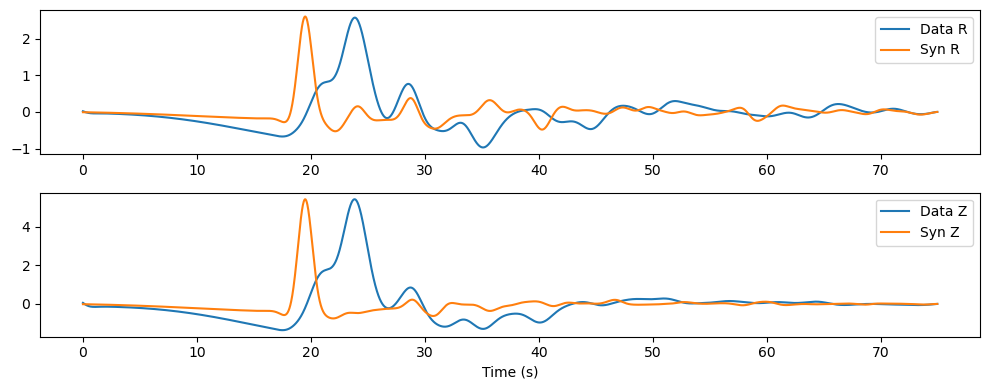

In [61]:
datr = obspy.read("../example_data/dat.MX.ST014.BXR.sac.T002_T040")[0]
datz = obspy.read("../example_data/dat.MX.ST014.BXZ.sac.T002_T040")[0]
synr = obspy.read("../example_data/syn.MX.ST014.BXR.sac.T002_T040")[0]
synz = obspy.read("../example_data/syn.MX.ST014.BXZ.sac.T002_T040")[0]
times = synz.times()

# datr.data = datr.data / np.max(np.abs(datz.data)) * np.max(np.abs(synz.data))
# datz.data = datz.data / np.max(np.abs(datz.data)) * np.max(np.abs(synz.data))
# datr.write("../example_data/dat.MX.ST014.BXR.sac.T002_T040", format="SAC")
# datz.write("../example_data/dat.MX.ST014.BXZ.sac.T002_T040", format="SAC")

plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(times, datr.data, label='Data R')
plt.plot(times, synr.data, label='Syn R')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(times, datz.data, label='Data Z')
plt.plot(times, synz.data, label='Syn Z')
plt.xlabel('Time (s)')
plt.legend()
plt.tight_layout()

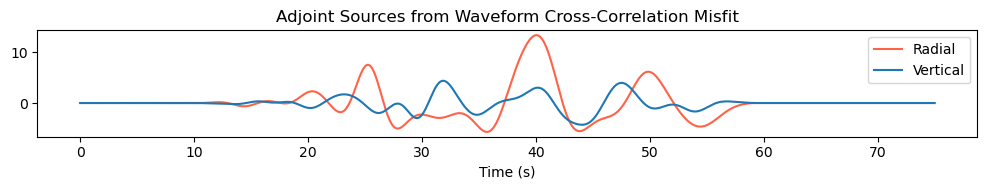

In [60]:
adj_r = obspy.read('./MX.ST014.BXR.wcc.adj.sac')[0]
adj_z = obspy.read('./MX.ST014.BXZ.wcc.adj.sac')[0]

plt.figure(figsize=(10, 2))
plt.subplot(1, 1, 1)
plt.plot(times, adj_r.data, label='Radial', color='tomato', lw=1.5)
plt.plot(times, adj_z.data, label='Vertical', color='C0', lw=1.5)
plt.legend()
plt.title('Adjoint Sources from Waveform Cross-Correlation Misfit')
plt.xlabel('Time (s)')
plt.tight_layout()